In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQd0aiqOiQTE0OZaaiyBMlKcy8MFzRhGfqNhOi5OJYSc8GGysBBZr0YPTpGmVBpf0LH5w31o8t5YSzw/pub?gid=1693173276&single=true&output=csv'

In [3]:
df_employer = pd.read_csv(url)
df_employer.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
basic_descriptive_statistics = df_employer.describe()
print(basic_descriptive_statistics)


              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.291248   25156.636930   
min      1.000

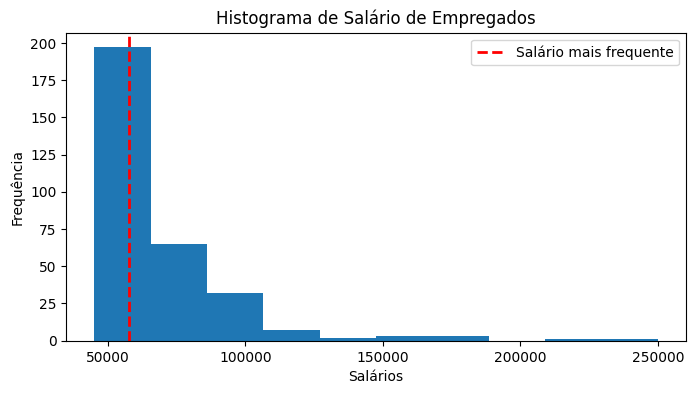

In [13]:
salarios = df_employer['Salary']
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(salarios, bins=10)
ax.set_title('Histograma de Salário de Empregados')
ax.set_xlabel('Salários')
ax.set_ylabel('Frequência')

salario_mais_frequente=salarios.mode()[0]
ax.axvline(x=salario_mais_frequente, color='red', linestyle='dashed', linewidth=2, label='Salário mais frequente')
ax.legend()



0      Masculino
1      Masculino
2       Feminino
3       Feminino
4       Feminino
         ...    
306    Masculino
307     Feminino
308     Feminino
309     Feminino
310     Feminino
Name: Sex, Length: 311, dtype: object


/home/rbsann/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


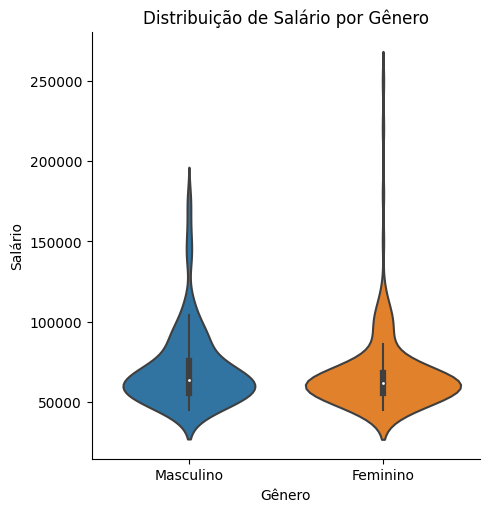

In [9]:
def gen(value):
  if value == 'M':
    return 'Masculino'
  elif value == 'F':
    return 'Feminino'
  else: 
    return 'Desconhecido'
df_employer['genero'] = df_employer['Sex'].map(gen)
ax = sns.catplot(data=df_employer, kind='violin', x='genero', y='Salary')
ax.set(xlabel="Gênero", ylabel="Salário", title="Distribuição de Salário por Gênero")


Text(0.5, 1.0, 'Série Temporal de Contratações')

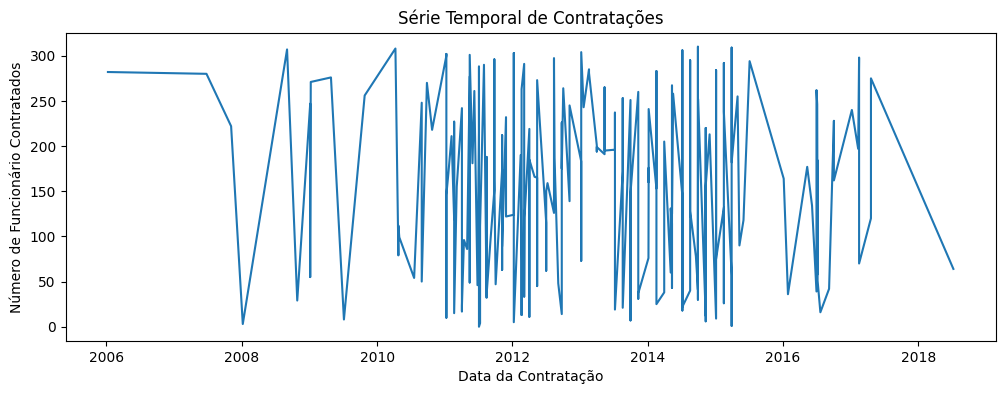

In [19]:
df_employer['DateofHire'] = pd.to_datetime(df_employer['DateofHire'])
df_employer.sort_values(by='DateofHire', inplace=True)
x = df_employer['DateofHire']
y = df_employer.index
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y)
ax.set_xlabel('Data da Contratação')
ax.set_ylabel('Número de Funcionário Contratados')
ax.set_title('Série Temporal de Contratações')